# Supervised machine learning (use RF as an example)

Here are the general steps:

Load and Explore the Dataset
Preprocess the Data
Split the Data into Training and Test Sets
Train a Random Forest Model
Evaluate the Model
Use the Model to Make Predictions
Use cross-validation (CV) 
Look at the feature importance
Find optimal hyperparameters (Grid Search)

## load and explore the dataset

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv(r'C:\Users\cherrychan9898\Downloads\ConcreteStrengthData.csv')

# Show the first few rows of the data
data.head()


,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


check if there are any missing values in the dataset, and to get some basic statistical information about each column. 

In [2]:
# Check for missing values
missing_values = data.isnull().sum()

# Get basic statistical information
statistics = data.describe()

missing_values, statistics

(CementComponent              0
 BlastFurnaceSlag             0
 FlyAshComponent              0
 WaterComponent               0
 SuperplasticizerComponent    0
 CoarseAggregateComponent     0
 FineAggregateComponent       0
 AgeInDays                    0
 Strength                     0
 dtype: int64,
        CementComponent   BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
 count       1030.000000       1030.000000      1030.000000     1030.000000   
 mean         281.167864         73.895825        54.188350      181.567282   
 std          104.506364         86.279342        63.997004       21.354219   
 min          102.000000          0.000000         0.000000      121.800000   
 25%          192.375000          0.000000         0.000000      164.900000   
 50%          272.900000         22.000000         0.000000      185.000000   
 75%          350.000000        142.950000       118.300000      192.000000   
 max          540.000000        359.400000       200.100000      

The dataset does not contain any missing values, which is great because it means we don't need to perform any imputation (a process of replacing missing data with substituted values). I am quite sure that for your dataset you need to do more to kinda clean the dataset.

## Data Preprocessing

Because our data doesn't have any missing values and all the features are numerical, we don't need to do any preprocessing like encoding categorical variables or imputing missing values. However, it's generally a good practice to normalise or standardise the data, especially when the scales of the features vary a lot.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features and the target
X = data.drop('Strength', axis=1)
y = data['Strength']

# Standardise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split the Data into Training and Test Sets

In [4]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((824, 8), (206, 8))

The data has been successfully standardized and split into training and test sets. The training set has 824 examples and the test set has 206 examples. Each example has 8 features.

## Train a Random Forest model
We'll use the RandomForestRegressor class from sklearn.ensemble. The Random Forest algorithm works by training a large number of individual decision trees on random subsets of the data and averaging their predictions. This helps to reduce overfitting and improve generalisation.

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Evaluate the Model
We'll use the model to make predictions on the test set, and then compare these predictions to the actual values.

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the model to make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

(3.73848481449376, 29.942186389395943, 0.8837994905853568)

## Use the Model to Make Predictions
Now that the model is trained, you can use it to predict the concrete strength for new data. You just need to make sure that the new data is preprocessed in the same way as the training data (i.e., the same features in the same order, and scaled in the same way). Let's demonstrate this with an example. We'll use the first example from the test set. Remember that you'll need to input the data in the form of a 2D array, even if you're only making a prediction for one example.

In [7]:
# Let's take the first example from the test set
example = X_test[0]

# Reshape it to a 2D array
example = example.reshape(1, -1)

# Use the model to make a prediction
prediction = rf.predict(example)

# Print the predicted and actual values
prediction[0], y_test.iloc[0]

(51.784999999999954, 52.91)

For the first example in the test set, our model predicted a concrete strength of approximately 51.78, while the actual strength was 52.91. 

## Use cross-validation (CV)
In k-fold cross-validation, the original sample is randomly partitioned into k equal-sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

Let's perform 5-fold cross-validation on our Random Forest model. We'll use the cross_val_score function from sklearn.model_selection with the R² score as the evaluation metric.

In [8]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='r2')

# Calculate the average R² score
cv_r2 = cv_scores.mean()

cv_r2

0.34953376032838585

The average R² score from 5-fold cross-validation is approximately 0.35. This is significantly lower than the R² score we got earlier on the test set. It might be due to the randomness in the data splitting process, causing some folds to have a harder time predicting the target variable, or it might indicate that our model is overfitting to the training data and not generalizing well to unseen data.

##  Look at the feature importances
Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable. In tree-based methods, the importance of a feature is usually calculated as the total reduction in the criterion brought by that feature, also known as the Gini importance (CAN BE SOMETHING ELSE YOU NEED TO EXPLORE). 

TO PLOT GRAPHS, CHECK 'numpy' OUT

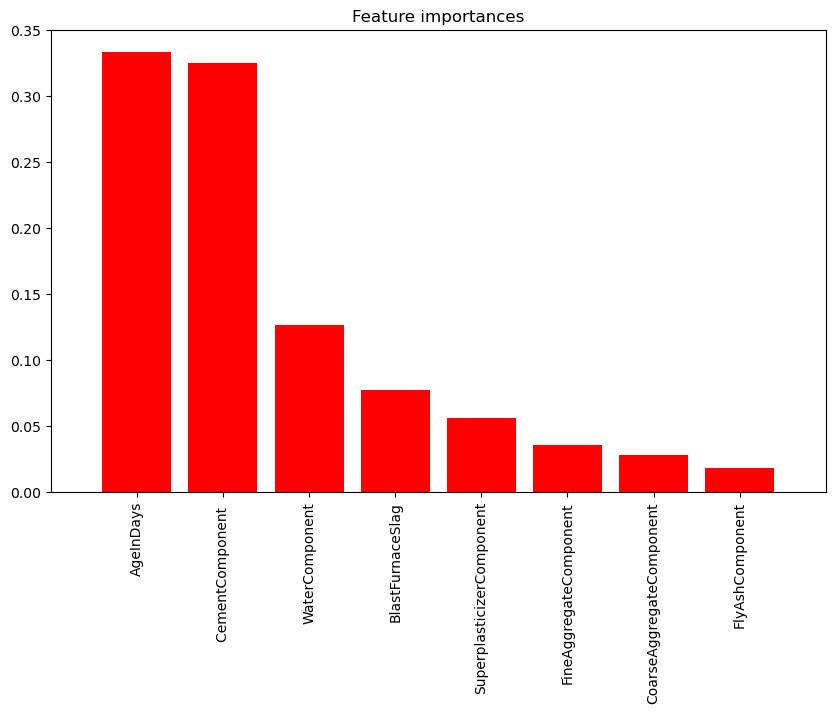

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a bar plot of the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(X.columns[indices], importances[indices], color="r", align="center")
plt.xticks(X.columns[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

## Find optimal hyperparameters (Grid Search)
Grid Search is a tuning technique that attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on a the specific parameter values of a model. The model is then evaluated at each combination of parameter values.

Here, we will tune the following parameters:
n_estimators: The number of trees in the forest.
max_depth: The maximum depth of the tree.
min_samples_split: The minimum number of samples required to split an internal node.
min_samples_leaf: The minimum number of samples required to be at a leaf node.

please make sure you sure what these are...you need to explore more on different models

In [10]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 5 folds for each of 108 candidates, totalling 540 fits


({'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.9086758560770086)

With these parameters, the model achieved an average R² score of approximately 0.91 across the 5 folds of the cross-validation. This is a significant improvement over the original model.

In [11]:
rf_optimal = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
rf_optimal.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

Calculate these metrics for our model...

In [12]:
# Initialize the Random Forest Regressor with the best parameters
rf_optimal = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# Train the model
rf_optimal.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred_optimal = rf_optimal.predict(X_test)

# Calculate the evaluation metrics
mae_optimal = mean_absolute_error(y_test, y_pred_optimal)
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)

mae_optimal, mse_optimal, r2_optimal

(3.790041746439244, 30.717388908911364, 0.8807910620592719)

Use this model to predict again...

In [13]:
# Let's take the third example from the test set
example_optimal_2 = X_test[2]

# Reshape it to a 2D array
example_optimal_2 = example_optimal_2.reshape(1, -1)

# Use the optimal model to make a prediction
prediction_optimal_2 = rf_optimal.predict(example_optimal_2)

# Print the predicted and actual values
prediction_optimal_2[0], y_test.iloc[2]

(71.40054999999981, 74.5)

For the third example in the test set, our optimized model predicted a concrete strength of approximately 71.40, while the actual strength was 74.5. As you can see, the prediction is quite close to the actual value.

## Conduct a sensitivity analysis

C:\Users\cherrychan9898\AppData\Local\Temp\ipykernel_18640\3366095557.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_data_scaled = mean_values_scaled.copy().append([mean_values_scaled]*(len(cement_df_scaled)-1), ignore_index=True)
C:\Users\cherrychan9898\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


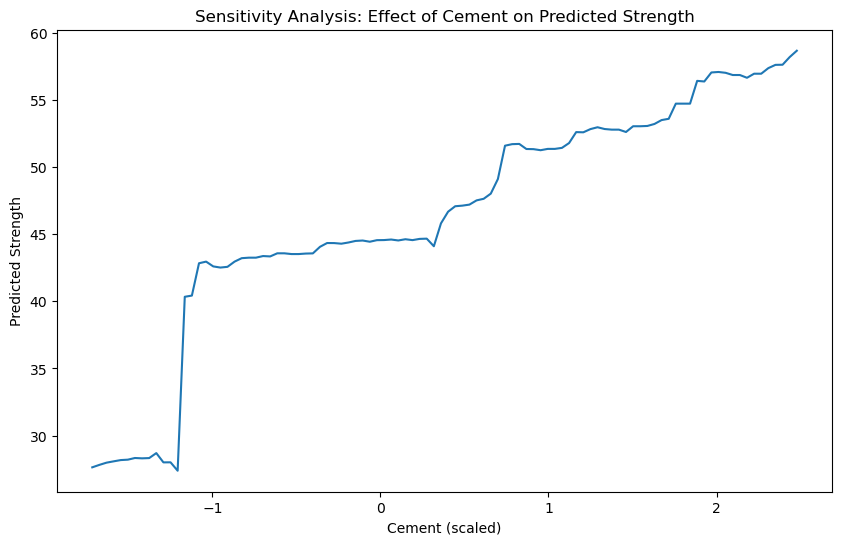

In [16]:
# Convert the scaled data back into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Create a DataFrame with the mean values of the features
mean_values_scaled = pd.DataFrame(data=np.array([X_scaled_df.mean()]), columns=X_scaled_df.columns)

# Create a range of values for the Cement variable (0th column)
cement_values_scaled = np.linspace(X_scaled_df.iloc[:, 0].min(), X_scaled_df.iloc[:, 0].max(), num=100)

# Create a DataFrame with these values repeated for each example
cement_df_scaled = pd.concat([pd.DataFrame(data=np.array([val]*len(mean_values_scaled)), columns=[0]) for val in cement_values_scaled], ignore_index=True)

# Replace the Cement values in the mean_values_scaled DataFrame with these values
sensitivity_data_scaled = mean_values_scaled.copy().append([mean_values_scaled]*(len(cement_df_scaled)-1), ignore_index=True)
sensitivity_data_scaled.iloc[:, 0] = cement_values_scaled

# Use the model to make predictions for this data
sensitivity_predictions_scaled = rf_optimal.predict(sensitivity_data_scaled)

# Plot the Cement values against the predicted Strength
plt.figure(figsize=(10, 6))
plt.plot(cement_values_scaled, sensitivity_predictions_scaled)
plt.xlabel('Cement (scaled)')
plt.ylabel('Predicted Strength')
plt.title('Sensitivity Analysis: Effect of Cement on Predicted Strength')
plt.show()


The plot above shows the predicted strength of the concrete as we vary the amount of cement (scaled), while keeping all other features constant at their mean values. This type of plot is a simple way to visualize the sensitivity of the model's predictions to changes in one of the input features.

From the plot, we can see that as the amount of cement increases, the predicted strength of the concrete also generally increases. This indicates that the model has learned a positive relationship between the amount of cement and the strength of the concrete, which makes sense intuitively.

However, the relationship is not strictly linear, and there are some fluctuations in the predicted strength as the amount of cement changes. This suggests that the other features also have an important impact on the predicted strength, and that the relationships between the features and the target variable are complex.

This sensitivity analysis gives us some insight into the model's predictions, but it's important to remember that it is a simplification. In reality, all of the features can interact with each other in complex ways, and changing one feature can have indirect effects on the target variable through its interactions with the other features.